In [1]:
%matplotlib  inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from franke import FrankeFunction, FrankePlot
from mpl_toolkits.mplot3d import Axes3D
import tools

In [26]:
seed = None
x,y,z,noise = tools.generate_data(N = 20, seed = seed, noise = 0.1)
deg = 5

from tools import get_X_poly2D, fit_poly2D
regr = fit_poly2D(x, y, z, deg = deg, lmbd = 0)

zhat = regr.yhat
beta = regr.beta
beta

array([  -47.51445927,   408.33589562,   288.88161348, -1157.91223316,
       -1677.8853516 ,  -526.07299062,  1394.58973316,  3248.86662908,
        2941.16368783,  -188.0807265 ,  -660.33948066, -3070.19394376,
       -2440.88623295, -2975.37117964,  1437.851556  ,    72.40502961,
        1044.82214957,   953.55377369,   852.1036389 ,  1178.86386274,
       -1006.70133611])

In [27]:
from scipy import linalg 
linalg.det(regr._symX)

5.311295945160254e-79

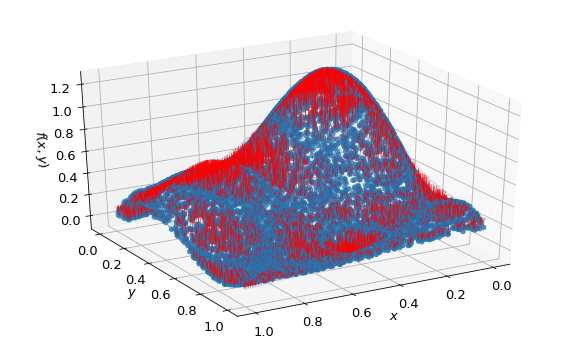

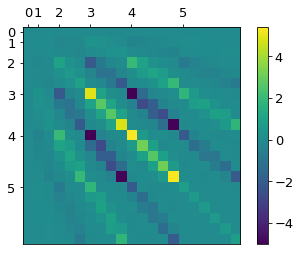

In [19]:
from plotting import plot_data_3D, plot_covar
plot_data_3D(x,y,z,zhat, beta)
plot_covar(regr,5)

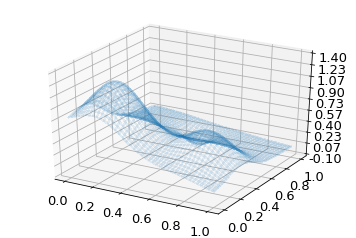

In [12]:
FrankePlot()

In [13]:
X = get_X_poly2D(x,y,deg = 5)
regr.betaVar.shape, X.shape, zhat.shape

((21, 21), (500, 21), (500,))

In [14]:
l0  = X[0]
l0.dot(regr.betaVar) @ l0
l = np.array([X[i].dot(regr.betaVar) @ X[i] for i in range(x.size)])

(array([ 22.,  96.,  74.,  83.,  48.,  34.,  26.,  17.,  16.,  13.,  12.,
          8.,   5.,   7.,   8.,   5.,   3.,   2.,   3.,   2.,   2.,   2.,
          2.,   2.,   0.,   1.,   3.,   1.,   1.,   2.]),
 array([ 0.12135202,  0.13360789,  0.14586377,  0.15811964,  0.17037551,
         0.18263139,  0.19488726,  0.20714313,  0.21939901,  0.23165488,
         0.24391075,  0.25616662,  0.2684225 ,  0.28067837,  0.29293424,
         0.30519012,  0.31744599,  0.32970186,  0.34195774,  0.35421361,
         0.36646948,  0.37872535,  0.39098123,  0.4032371 ,  0.41549297,
         0.42774885,  0.44000472,  0.45226059,  0.46451647,  0.47677234,
         0.48902821]),
 <a list of 30 Patch objects>)

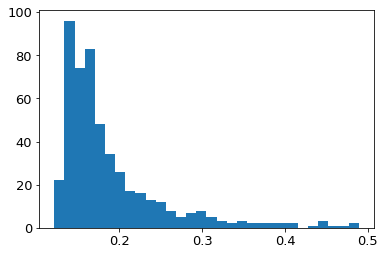

In [15]:
plt.hist(np.sqrt(l), bins = 30)

In [16]:
var = np.average(np.sqrt(l))

z_gt = FrankeFunction(x,y)
zhat = regr.predict(X)

zerr = np.average((zhat-z_gt)**2)
bias_squared = zerr - var - noise**2
print(zerr, var)
bias_squared, var

0.0418615807768 0.188250055258


(-1.1463884744810038, 0.18825005525775382)

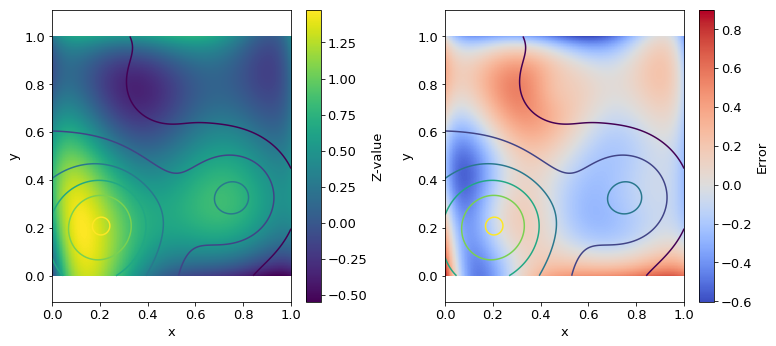

In [17]:
import plotting
fig = plotting.contour_plot(regr)

In [18]:
var = np.diag(((X.dot(regr.betaVar)) @ X.T))

bias = zerr - var - noise**2
bias

array([-1.02621582, -0.98347954, -1.04611037, -0.97877398, -1.18701923,
       -0.97891875, -0.98540966, -0.97875924, -0.9777957 , -1.04623002,
       -0.98651135, -0.99900531, -0.98244652, -0.97822716, -0.98414445,
       -0.97873013, -0.9834766 , -0.97754452, -0.98325216, -1.00266582,
       -1.04203969, -0.98369598, -0.99166165, -0.98367645, -0.97820417,
       -0.99202529, -0.97699988, -0.97786627, -0.98168571, -0.97949891,
       -0.98411903, -1.00146289, -0.97735776, -0.99746606, -0.98576628,
       -0.98356827, -0.99423291, -0.97767298, -1.01400347, -0.9885013 ,
       -0.99718093, -1.00881694, -1.05661581, -0.99945405, -0.9850705 ,
       -0.98287133, -0.97997863, -0.98499786, -0.983508  , -0.97484228,
       -0.97525149, -1.00675717, -1.02980043, -0.98876394, -0.99079773,
       -0.98927769, -1.15765388, -0.98363268, -0.99012964, -0.99265713,
       -0.97866163, -1.0270473 , -0.9888252 , -0.97739745, -0.97716309,
       -0.97886484, -0.9792622 , -0.99392861, -1.01502933, -1.01

In [ ]:
from plotting import contour_plot
from sklearn.linear_model import Lasso

X = get_X_poly2D(x, y, deg = deg)
z_gt = FrankeFunction(x,y)

for alpha in np.linspace(0.0005, 0.010, 10):
    regr = Lasso( alpha = alpha ,fit_intercept = False)
    regr.fit(X, z)

    beta = regr.coef_
    
    zhat = regr.predict(X)
    
    df_exps = tools.get_exp_coeffs(beta, deg = 5, print_beta=False)
    plt.figure()
    plt.title('alpha = {:.4f}'.format(alpha))
    m = plt.imshow(df_exps)
    plt.colorbar(m)
#     fig = contour_plot(regr, plot_err = True)
#     print('total feil: {}'.format(np.sum(np.abs(zhat - z_gt))))
#     fig.suptitle('alpha = {:.4f}'.format(alpha))

/home/halvard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
symX = X.T @ X
N = symX.shape[0]
lmbd = 0.1

from scipy import linalg
beta = linalg.inv(symX + lmbd*np.eye(N)) @ X.T @ z

beta

In [ ]:
df_exps = tools.get_exp_coeffs(beta, deg = 5, print_beta = False)
plt.imshow(df_exps)

In [ ]:
plt.imshow(df_exps)

In [29]:
x = np.arange(100)

k = 7
N = x.size

x[:int(N/k)].size * 7


indexes = np.linspace(0,N,k+1, dtype = int)
sizes = np.diff(indexes)

for i in range(k):
    start = indexes[i]
    stop = indexes[i+1]
    print(x[start:stop].shape)
    # print(x[start:stop].shape)
    
for size in sizes:
    test = x[:size]
    train = x[size:]
    
    x = np.roll(x,-size)
    print(test)
indexes, sizes

(14,)
(14,)
(14,)
(15,)
(14,)
(14,)
(15,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27]
[28 29 30 31 32 33 34 35 36 37 38 39 40 41]
[42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]
[57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


(array([  0,  14,  28,  42,  57,  71,  85, 100]),
 array([14, 14, 14, 15, 14, 14, 15]))